# Introduction to Neural Networks

In this assignment you first will be introduced to the components of a deep learning model. You will study the code that creates and executes a model and you will apply the theoretical background to propose a model for image data. 

Learning goals:
- understand components of a deep learning model and how they work mathematically
- relate the components to the hyperparameters and model setup of keras tensorflow model
- propose improvements in design 

Data:

The data we will use is the Breast Cancer Wisconsin (Diagnostic) Data Set of the UCI Machine Learning Repository. You are however free to use your own dataset of interest to study the code. 

<a name='2'></a>
In case you want to study image data classifications you can use a dataset like the Dataset of breast ultrasound imagesfrom Al-Dhabyani W, Gomaa M, Khaled H, Fahmy  2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863


Sources used: 
- https://medium.com/mlearning-ai/binary-classification-of-breast-cancer-diagnosis-using-tensorflow-neural-networks-30ac8f40388
- Deep Learning for the Life Sciences by Bharath Ramsundar, Peter Eastman, Pat Walters, Vijay Pande Released April 2019 Publisher(s): O'Reilly Media, Inc. ISBN: 9781492039839 https://www.oreilly.com/library/view/deep-learning-for/9781492039822/



# Assignment

Study the material and answer the questions

1. Study the [background text](#0)
2. Study the [code steps](#1). Add comments in your own words and explain design choices such as
    - number of [layers](#01), 
    - [width](#02) of layers, 
    - number of [epochs](#03), 
    - [activation functions](#04), 
    - [loss function](#05), 
    - [gradient descent function](#06), 
    - [regularization function](#07)
3. Run the [code](#1). Evaluate the performance by discussing the results of the evaluation metrics. What hyper parameters would you recommend to change? Explain your choices. 
4. How do I set up a `batch_size` and how does it effect the outcome? Why do you think the batch_size was not set in the first place?
5. (Optional) Would there be a possibility to execute cross validation? How? 
6. (Optional) How can I introduce a validation test set? What would I need to change in the code?
7. Study the [tensor](#2) text. Consider a dataset of breast cancer images. What needs to be changed to the deep learning model design to make a model based on pictures? You can answer this in words, but if you like you can also try to code the solution. 

<a name='0'></a>
# Background Deep Learning Models

## Linear models

One of the simplest model is a linear model

$y = \theta x + b$ in which $x$ is the data, $\theta$ are the weights and $b$ is the bias vector. Their sizes are determined by the numbers of input and output values. If $x$ has length $m$ and you want $y$ to have lenght $s$ then $\theta$ will be a $s \times m$ matrix and $b$ will be a vector of length $s$. By this equation each output is a linear combination of the input components. By setting $\theta$ and $b$ you can choose any linear combination you want for each component. This model is introduces in 1957 and called perceptron. 

Unfortunately straight lines often does not fit real datasets. This problem becomes worse in high dimensional data.

<a name='01'></a>
## Multilayer perceptrons

A simple approach to this problem is to stack multiple linear transformations

$y = \theta_2 \varphi(\theta_1 x + b_1) + b_2$. Now the result of the ordinary linear transformation $\theta_1 x + b_1$ is passed through a nonlinear function $\varphi(x)$. We call this function $\varphi(x)$ *activation function*. By combining linear with non linear we enable the model to learn a much wider range of functions. 

And we do not need to stop. We can stack as many as we want on top of each other.

$$ h_1 = \varphi_1(\theta_1 x + b_1)$$

$$ h_2 = \varphi_2(\theta_2 h_1 + b_2)$$

$$ h_3 = \varphi_3(\theta_3 h_2 + b_2)$$

$$...$$

$$ h_{n-1} = \varphi_{n-1}(\theta_{n-1} h_{n-2} + b_{n-1})$$

$$ y = \varphi_n(\theta_n h_{n-1} + b_n)$$


## Neural network

Multilayer perceptrons start with an input layer $x$ and information flows from one layer to the next layer resulting in the output layer $y$. This principle is also called *Neural Network*. 

<a name='04'></a>
## Nodes
A deep learning node is "a computational unit that has one or more weighted input connections, a transfer function that combines the inputs in some way, and an output connection. Nodes are then organized into layers to comprise a network

<a name='04'></a>
## Activation functions 
Activation functions serve two main purposes: 

1. to assist a model in accounting for **interaction effects**. An interactive effect occurs when the prediction of one variable, let's say A, is influenced differently based on the value of another variable, let's call it B. To illustrate this, consider a scenario where a model aims to determine whether a certain body weight indicates an increased risk of diabetes. In order to make an accurate prediction, the model needs to take into account the individual's height as well. Some bodyweights may indicate a higher risk for shorter individuals, while signaling good health for taller individuals. Thus, the impact of body weight on diabetes risk is contingent on height, and we can describe weight and height as having an interaction effect.

2. Assist a model in capturing **non-linear effects**. This refers to the situation where plotting a variable on the horizontal axis and the corresponding predictions on the vertical axis does not result in a straight line. In other words, the impact of increasing the predictor by one unit varies at different values of that predictor. <a href="https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning" target="_blank">link</a>



What should the activation function be? Most popular is the *rectified linear unit* (`RelU`) $\varphi(x) = max(0,x)$ function, which you can use as a default. Another popular function is the `logistic sigmoid` function ($\varphi(x) = 1/(1 + e^{-x})$) 

**Rectified Linear Function**: The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value x it returns that value back. So it can be written as f(x)=max(0,x). 

**Sigmoid Functions**: A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point and exactly one inflection point. A sigmoid "function" and a sigmoid "curve" refer to the same object. <a href="https://en.wikipedia.org/wiki/Sigmoid_function" target="_blank">wiki</a>

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. A common example of a sigmoid function is the logistic function shown in the first figure and defined by the formula:

$$
\varphi(x) = 1/(1 + e^{-x})
$$ 

Other standard sigmoid functions are given in the Examples section. In some fields, most notably in the context of artificial neural networks, the term "sigmoid function" is used as an alias for the logistic function. 

A diverse range of sigmoid functions, such as the logistic and hyperbolic tangent functions, have been employed as activation functions for artificial neurons. Sigmoid curves are also prevalent in statistics, where they serve as cumulative distribution functions that range from 0 to 1. Examples include the integral representations of the logistic density, the normal density, and the Student's t probability density functions. Notably, the logistic sigmoid function is invertible, and its inverse is known as the logit function.

Sigmoid functions would seem to have a couple advantages. Even though it gets close to flat, it isn't completely flat anywhere. So it's output always reflects changes in it's input, which we might expect to be a good thing. Secondly, it is non-linear (or curved everywhere). Accounting for non-linearities is one of the activation function's main purposes. So, we expect a non-linear function to work well.

However researchers had great difficulty building models with many layers when using the tanh function. It is relatively flat except for a very narrow range (that range being about -2 to 2). The derivative of the function is very small unless the input is in this narrow range, and this flat derivative makes it difficult to improve the weights through gradient descent. This problem gets worse as the model has more layers. This was called the vanishing gradient problem.

The ReLU function has a derivative of 0 over half it's range (the negative numbers). For positive inputs, the derivative is 1. When training on a reasonable sized batch, there will usually be some data points giving positive values to any given node. So the average derivative is rarely close to 0, which allows gradient descent to keep progressing.

<a name='02'></a>
## Deep learning

In the model there are two parameters to consider. Width and Depth. The width refers to the size of the layers. We can choose $h_i$ to have any length. They can be larger or smaller then the input and output vectors. Depth refers to the number of layers. When we have only one hidden layer the model is shallow. When we have many layers the model is described as deep, hence deep learning. Often the choice of width and depth is more art then science. 
<a name='05'></a>
## Loss functions

To train the model we need a training dataset with a large number of samples $(x,y)$ and an loss function $L(y, \hat{y})$. To calculate the loss `Euclidean distance` is often used $L(y, \hat{y}) = \sqrt{\sum_i (y_i - \hat{y}_i)^2}$. When $y$ represents a probability distribution, a popular choise is the `cross entropy` $L(y, \hat{y}) = -\sum_i y_i log (\hat{y}_i)$. We measure the model performance by taking the average loss over every sample. 

average loss: $\langle L \rangle = \frac{1}{N} \sum_{i=1}^{N} L(y, \hat{y})$
<a name='06'></a>
## Gradient descent
Now we have a way to determine how well the model works we need a way to improve it. We search for parameters that minimizes the average loss over the training set. Most work in deep learning use some kind of gradient descent algorithm with learning rate $\epsilon$. $$\theta \mathrel{\mathop:} = \theta - \epsilon \frac{\partial}{\partial\theta} \langle L \rangle$$


However with deep learning this takes enormous amount of time. Therefor it is better to use *stochastic gradient descent* (SDG). For every step we take a small set of samples (known as batch) from the training set instead of all samples. The time of each step now is depending on the batch size. The downsite is that is does a lesser job on reducing the loss because it is based on an estimated gradient, not the true gradient. Most deep learning algorithms use SDG. Two of the most popular algorithms are `Adam` and `RMSProp`. 

**Adam**:

The Adam optimizer represents an extended version of stochastic gradient descent that finds utility across a range of deep learning applications, including potential integration into fields like computer vision and natural language processing in the coming years. It made its debut in 2014 and was prominently featured at the ICLR 2015 conference, a gathering of leading deep learning researchers. Operating as an optimization algorithm, Adam offers an intriguing alternative to the conventional stochastic gradient descent process. The name "Adam" is a fusion of "adaptive moment estimation," signifying its core principle of leveraging estimations for both the first and second moments of gradients to dynamically adjust the learning rates for individual weights within a neural network. Notably, "Adam" is not an acronym but rather a distinct label. <a href="https://optimization.cbe.cornell.edu/index.php?title=Adam" target="_blank">link</a> 


Adam has been positioned as an exceptionally efficient stochastic optimization technique, proficiently utilizing only first-order gradients and demanding minimal memory resources. This stands in contrast to its predecessors like AdaGrad and RMSP, which, while showcasing commendable performance gains over SGD in several scenarios, encountered limitations in terms of generalization, sometimes even trailing behind SGD. The introduction of Adam aimed to address these concerns, focusing on enhanced generalization performance.

A distinctive characteristic of Adam lies in its hyperparameters, which possess intuitive interpretations, leading to reduced demands for intricate tuning. This design attribute contributes to its accessibility and ease of use, setting it apart as a valuable tool in the deep learning optimization toolkit.

**Root Mean Square Propagation (RMSP)**:

RMSP is an adaptive optimization algorithm that is an improved version of AdaGrad. RMSP tackles to solve the problems of momentum and works well in online settings. In AdaGrad we take the cumulative summation of squared gradients but, in RMSP we take the 'exponential average'. <a href="https://optimization.cbe.cornell.edu/index.php?title=Adam" target="_blank">link</a> 

<a name='03'></a>
## Epoch and Batch
`epoch = 10` means that 10 epochs of gradient descent training will be conducted. 
During one epoch, the model is presented with each training example once, and the model's parameters are updated based on the loss incurred on those examples. In practical terms, an epoch consists of two main steps:

- Forward propagation: Each training example is fed through the model, and the model produces predictions for each example.

- Backward propagation (also known as backpropagation): The model calculates the loss between the predicted outputs and the actual labels. The gradients of the loss with respect to the model's parameters are then computed, allowing the model's parameters to be updated in the direction that minimizes the loss.

After one epoch is completed, the model has seen and learned from all the training examples once. Typically, multiple epochs are performed to allow the model to further refine its parameters and improve its performance. One can study the following <a href="https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning" target="_blank">link</a>  for further information.

Learning algorithms undergo numerous epochs, ranging from a few tens to potentially exceeding a thousand, in order to meticulously minimize model errors. The scope of epochs can span from as few as ten iterations to as many as a thousand or more. Graphing a learning curve involves juxtaposing data points that correspond to the progression of epochs. This depiction illustrates the relationship between the number of iterations on the x-axis, representing time, and the model's proficiency on the y-axis. By observing this graph, valuable discernments can be gleaned regarding whether the model has encountered issues of underfitting, overfitting, or a balanced fit vis-à-vis the training dataset.

The batch size, a pivotal hyperparameter, determines the quantity of samples processed within a given machine learning model prior to updating its internal parameter configuration.

Conceptually, a batch corresponds to an iterative loop that iterates over one or more samples, executing predictions for each. These predictions are subsequently juxtaposed against the expected output variables, culminating in the computation of an error. This computed error serves as the basis for refining the model.

In practice, a training dataset can be subdivided into multiple batches. The learning approach varies based on batch configuration. When a solitary batch encompasses all the training data, the method is termed batch gradient descent. In the scenario where each batch consists of a single sample, the technique is referred to as stochastic gradient descent. An intermediary approach, termed mini-batch gradient descent, emerges when the batch size ranges from more than one sample to less than the training dataset's overall size.

<a name='07'></a>
## Regularization

To avoid overfitting we use regularization. In deep learning a popular method is called `dropout`. For each layer in the model, you randomly select a subset of elements in the output vector $h_i$ and set them to 0. On every step in the gradient descent, you pick a different random subset. By using dropout you asume that no individual calculation within the model should be too important.

Dropout serves as an insightful regularization technique that mimics the concurrent training of multiple neural networks, each designed with unique characteristics. Throughout the training process, a random selection of layer outputs is intentionally disregarded or "dropped." This dynamic adjustment causes the layer to adopt an appearance and functionality distinct from its original design, including a varying count of nodes and connections to the preceding layer. In practice, each update made to a layer during training unfolds with a fresh perspective, effectively injecting an element of diversity into the learning process. This element of dropout introduces controlled noise into training, prompting nodes within a layer to probabilistically assume more or less responsibility for processing inputs.

From a conceptual standpoint, dropout's innovative approach can disrupt situations where network layers become overly interdependent, a phenomenon known as co-adaptation, in order to rectify errors propagated from earlier stages. This deliberate disruption contributes to the model's enhanced robustness and adaptability.

Dropout is strategically applied on a per-layer basis within a neural network. Its applicability extends across a wide array of layer types, encompassing densely connected, convolutional, and recurrent layers, such as the long short-term memory (LSTM) network layer. It is noteworthy that dropout can be employed on any or all of the network's hidden layers, as well as the visible or input layer, while being deliberately excluded from the output layer to maintain consistency in predictions.

## Hyperparameters optimization

In summary there are a lot of choices to make. Such as

- Number of layers in the model
- Width of each layer
- Activation function
- Learning rate
- Batch size
- Loss function
- Number of epochs
- Number of elements to set to 0 when using dropout


## Using validation set
Ideally we want a low loss on the test set. But we cannot use the test set for training. We can use another approach however, with a validation set. 

- For each set of hyperparameters train the model on the training set and compute loss on validation set. 
- Whichever set of hyperparameters give the lowest loss on the validation set, accept them as your final model
- Evaluate that final model on the test set to get an unbiased measure


<a name='2'></a>
# Background Tensors

Tensors are a fundamental concept in the field of mathematics and play a vital role in understanding and manipulating data in various dimensions. 

### scalar
A scalar is a **0D** tensor, representing a single number. It has no dimensions or axes. Scalars are the simplest form of data representation

### vector
Moving on to the next level, we encounter vectors. Vectors are **1D** tensors consisting of an array of values along a single axis. 

### matrix
The next type of tensor is the matrix, which is a **2D** tensor. Matrices are arranged in rows and columns and can be thought of as a rectangular grid of numbers. They are extensively used in various mathematical operations, such as linear transformations and matrix multiplications. In machine learning the feature matrix X is a 2D tensors of shape(samples, features). 


### 3D tensor
When we pack multiple matrices together in a new array, we obtain a 3D tensor. This tensor can be visually interpreted as a cube of numbers, with three axes representing depth, height, and width. Timeseries data is often represented by a 3D tensors with shape (samples, timesteps, features) 


### 4D and beyond
By further extending this concept, we can create even higher-dimensional tensors. For instance, packing 3D tensors into an array gives rise to a 4D tensor. Similarly, the process can be repeated to form 5D tensors and beyond

A single image has 3 dimensions, height, width and color-channel. A dataset with multiple images is a 4D tensor of shape (samples, height, width, channels) or (samples, channels, height, width). 

In the case of videos we even have a 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)


### Tensor transformation
All transformations learned by deep neural networks can be reduced to a handful of tensor operations applied to tensors of numeric data. For instance, it’s possible to add tensors, multiply tensors, and so on.
A tensor operation example is a relu activation function. A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors. The layer’s weights learned with gradient descent.

Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the network parameters with respect to the loss on the batch. The network parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient

The entire learning process is made possible by the fact that neural networks are chains of differentiable tensor operations, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.


### Layers
Different layers are appropriate for different tensor formats and different types of data processing. For instance, simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or **dense layers** (the `Dense` class in Keras)
Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by **recurrent layers** such as an `LSTM` layer. 
Image data, stored in 4D tensors, is usually processed by 2D **convolution layers** `(Conv2D)`.

Continuing with this notebook, my initial focus involves elucidating the core concepts of Fully Connected Neural Networks (FCNNs) and Convolutional Neural Networks (CNNs), while also highlighting their distinctions. Following this, I will proceed to outline a comprehensive guide on effectively harnessing the capabilities of the Keras package.

### FCNN vs. CNN
Understanding the architecture of a neural network can be challenging initially. Crafting a neural network entails making a multitude of design decisions, including determining input and output dimensions for each layer, strategically placing batch normalization and dropout layers, selecting appropriate activation functions, and more. In this discussion, I aim to delve into the underlying mechanics of fully connected layers and convolutional operations, while also exploring the methodology to compute output dimensions for convolutional layers. <a href="https://builtin.com/machine-learning/fully-connected-layer" target="_blank">link</a> 

In recent years, the field of deep learning has experienced a remarkable surge, propelled by enhanced computational capabilities and advancements in model architecture. When delving into the realm of deep learning, two prominent network types frequently discussed are fully connected neural networks (FCNNs) and convolutional neural networks (CNNs). Serving as foundational pillars for deep learning frameworks, these networks lay the groundwork upon which numerous other intricate neural architectures are built. To facilitate comprehension, this discussion will commence by elucidating the mechanics of fully connected layers, subsequently demystify convolutional layers.

**FCNN**:

A fully connected layer refers to a neural network in which each neuron applies a linear transformation to the input vector through a weights matrix. As a result, all possible connections layer-to-layer are present, meaning every input of the input vector influences every output of the output vector. However, not all weights affect all outputs. The weights of a neuron only affect one output such as output A, and do not have an effect on other outputs like outputs B, C or D.

**CNN**:

A convolution can be likened to a sliding dot product, where a kernel traverses the input matrix, computing dot products as if they were vectors. Unlike dense connections, convolutions exhibit a sparse connectivity pattern, where not every input node influences all output nodes. This attribute grants convolutional layers heightened adaptability in the learning process. Furthermore, the reduced quantity of weights per layer proves advantageous, particularly when dealing with high-dimensional inputs like image data. These merits collectively underlie the renowned capability of Convolutional Neural Networks (CNNs) to discern and absorb intricate features from data, including shapes and textures within images.

**How to Work With Fully Connected Layers and Convolutional Neural Networks**

In the case of Fully Connected (FC) layers, determining the output size is straightforward—simply by selecting the number of columns in the weights matrix. However, this simplicity doesn't extend to convolutional layers. Convolutions encompass a multitude of parameters that can be adjusted to tailor the resulting output size of the operation.

To determine the output size of the convolution, the following equation can be applied:

$$
n_{out}=\frac{n_{in}-2p-k}{s} + 1
$$

Where, $n_{out}$ is the number of output layer, $n_{in}$ is the number of input layers, p is the **padding** number, k is the **kernel** number, and s is **stride** number. I explained the concept of kernel fully in the privious assignments, so here I just describe **padding** and **stride**.

**Padding**: Padding is a technique employed that guarantees that the input data has the exact size and shape that the model anticipates after every convolutional operation at each stage of the deep learning model. In order to work the kernel with processing in the image, padding is added to the outer frame of the image to allow for more space for the filter to cover in the image. Adding padding to an image processed by a CNN allows for a more accurate analysis of images. <a href="https://www.baeldung.com/cs/deep-neural-networks-padding" target="_blank">link1</a>, <a href="https://analyticsindiamag.com/guide-to-different-padding-methods-for-cnn-models/" target="_blank">link2</a>

**Stride**: Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video. For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit, at a time. <a href="https://medium.com/machine-learning-algorithms/what-is-stride-in-convolutional-neural-network-e3b4ae9baedb" target="_blank">link</a>

The resultant size of the output is determined by the input size, with the addition of twice the padding, minus the kernel size, divided by the stride, plus one. This equation is frequently applied to square matrices, yielding the same value for both rows and columns. In cases where the division does not yield an integer, the value is rounded up to the nearest whole number. 

The division by the stride is logical, as it reflects the reduction in output size due to the skipped operations. The inclusion of twice the padding arises from the padding being applied on both ends of the matrix, effectively accounting for the padding twice.

Based on the provided equation, the resulting output size tends to be either equal to or smaller than the input size, unless significant padding is applied. However, excessive padding can lead to challenges in learning, as it creates sparse inputs for each layer. To address this issue, transposed convolutions are employed to effectively expand the input dimensionality and overcome the sparse input problem. The mentioned technique utilizes the following formula to calculate the number of output:

$$
n_{out}=(n_{in}-1)-2p+(k-1) + 1
$$

# Keras

Keras serves as a neural network Application Programming Interface (API) designed for Python, closely integrated with TensorFlow, a framework utilized for constructing machine learning models. Keras' models provide an intuitive and user-friendly approach to outlining a neural network structure. TensorFlow subsequently takes charge of constructing the network according to the specified architecture through the Keras API. <a href="https://www.activestate.com/resources/quick-reads/what-is-a-keras-model/" target="_blank">link</a>

TensorFlow stands as an open-source collection of libraries designed to facilitate the creation and manipulation of neural networks, particularly those applied in Machine Learning (ML) and Deep Learning endeavors.

In contrast, Keras functions as a high-level Application Programming Interface (API) built atop TensorFlow. Keras streamlines the development of intricate neural network structures by providing an accessible and user-friendly framework. It abstracts and simplifies the process of implementing complex neural networks, allowing users to design models with greater ease and efficiency.

### When to Use Keras vs TensorFlow 
TensorFlow serves as a comprehensive machine learning platform, encompassing a spectrum of capabilities spanning from high-level to low-level functionalities, catering to the construction and deployment of machine learning models. Nonetheless, it does present a notable learning curve. It is particularly well-suited for scenarios where the following requirements are present:

1. Deep Learning Research: TensorFlow is highly conducive to in-depth exploration and experimentation in the realm of deep learning.

2. Complex Neural Networks: Its capabilities shine when dealing with intricate and multifaceted neural network architectures.

3. Large Datasets: TensorFlow is aptly equipped for managing and processing substantial datasets, making it suitable for tasks involving extensive data.

4. High-Performance Models: It excels in the creation of models geared towards achieving high levels of performance and computational efficiency.

Conversely, Keras is an ideal choice for individuals who lack an extensive foundation in Deep Learning but still aspire to engage with neural networks. With Keras, you can swiftly and effortlessly construct a neural network model using minimal code, facilitating the process of rapid prototyping. It offers a user-friendly interface that simplifies the creation of neural network architectures without requiring an in-depth understanding of the intricacies of Deep Learning. Moreover, Keras is often considered to be less error-prone than TensorFlow, leading to increased likelihood of model accuracy when using Keras as compared to TensorFlow. This is because Keras provides a higher level of abstraction and encapsulation of complex operations, which can reduce the potential for implementation errors and streamline the model development process. As a result, users may find it easier to achieve accurate models with Keras due to its emphasis on simplicity and user-friendly design.

### Keras Models
When working with Keras, the central entities are the models. These models serve as the foundation for defining TensorFlow neural networks, encompassing attributes, functions, and layers according to your requirements.

Keras provides several distinct APIs that enable the specification of your neural network structure, comprising:

1. **Sequential API**: This approach involves creating a model layer by layer, making it well-suited for many problem types. It's simple and straightforward, resembling a list of layers. However, it is limited to constructing single-input, single-output layer stacks.

2. **Functional API**: Offering a comprehensive and versatile interface, the Functional API supports a wide range of model architectures. It allows for greater complexity and flexibility compared to the sequential approach.

3. **Model Subclassing**: This advanced technique empowers you to build models entirely from the ground up. While suitable for intricate research and specialized scenarios, it is less commonly used in practical applications.



<a name='1'></a>
# Study Case

Consider the Breast Cancer Wisconsin (Diagnostic) Data Set. UCI Machine Learning Repository: Breast Cancer Wisconsin (diagnostic) data set. (n.d.). https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Consider the code below. 

I have studied this dataset in Assignment5. Consequenly, I will use its inspection part here.

### Data Loading 

In [1]:
# General modules
import yaml
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Data modules
from sklearn.model_selection import train_test_split

# Preprocessing modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Deep learning modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Conv2D

# Evaluation modules
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#inspired by https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

def configReader():
    """
    explanation: This function open config,yaml file 
    and fetch the gonfigue file information
    input: ...
    output: configue file
    """
    with open("config.yaml", "r") as inputFile:
        config = yaml.safe_load(inputFile)
    return config

In [3]:
def dataframe_maker(config):
    file_directory, file_name_titanic = config.values()
    os.chdir(file_directory)
    df_titanic = pd.read_csv(file_name_titanic).drop('Unnamed: 32', axis=1)
    return df_titanic

df = dataframe_maker(configReader())
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


This dataset consists of 569 samples with 32 features. I have inspected and analyzed the dataset in Assignment 5. Therefore, for this assignment, you can refer to the aforementioned Assignment for a comprehensive overview. In this context, I will employ the inspector function to showcase a selection of its distinctive attributes.

### Data Inspection

In [4]:
def inspecting_data(df):

    # find the shape of data
    print(f'dataset has {df.shape[0]} observations, and {df.shape[1]} variables\n')

    # finding the information of this dataset
    print(f'{df.info()}\n')

    # extract the number of null values of the dataset
    null_values = df.isnull().sum().sum()
    print(f'the total number of null values in this dataset is {null_values}\n')

    # find whether the number of unique ids is equel to the number of observations
    if df.id.unique().shape[0] == df.shape[0]:
        print(f'the number of unique IDs is {df.shape[0]}, which it is equal to the number of observations\n')
    
    # find the distributaion of the datapoints in the label column
    member_numbers = df.diagnosis.value_counts()
    print(f'number of members in each diagnosis category')
    print(f'{member_numbers}\n')
    print(f'Benign (B): {(member_numbers[0] / df.shape[0]).round(3)}%')
    print(f'Malignant (M): {(member_numbers[1] / df.shape[0]).round(3)}%\n')

    # find the number of negative or zero datapoints 
    print(f'This dataset contains {df.iloc[:,2:][df.iloc[:,2:]<0].count().sum()} negative values\n')
    print(f'This dataset contains {df.iloc[:,2:][df.iloc[:,2:]==0].count().sum()} zero values')

In [5]:
inspecting_data(df)

dataset has 569 observations, and 32 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non

During the data inspection phase, it was observed that the dataset consists of 30 float features, one integer column representing the ID, and a categorical column containing the labels. 

Before entering the next step, I found it valuable to compare the mean values of features for these two categories, and find whether there is any different between their mean values.

In [6]:
# this table shows that these two cance categories (M, B) are completely different from each other
df.copy().groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Almost all the malignant tumours' features are greater than Benign tumours, especially when it comes to spatial attributes. It shows that Malignant tumours are in average larger than their benign counterparts. Also, these tumours are more concave and compact. However, there is no clear evidece of any difference in the smoothness of the tumours from these two categories. Based on the table one can see the difeerence between values of different features is evident. To continue, the next step will be preprocessing.

### Preprocessing Data
In this section, I've opted not to perform preprocessing independently. Instead, I've employed the same operations that our instructor utilized in the educational notebook.

Therefore, the initial step involves utilizing the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html" target="_blank">LabelEncoder</a> library to convert the 'diagnosis' column (label column) into binary values '0' and '1'. Subsequently, the dataset will be partitioned into training and testing subsets, with the testing set accounting for 20% of the original dataset. Lastly, both the training and testing datasets will undergo normalization using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html" target="_blank">MinMaxScaler</a> library, ensuring that the entire feature range is transformed to the interval [0, 1].

In [7]:
# Transform the label column
le = LabelEncoder()
le.fit(df['diagnosis'])
df['diagnosis'] = le.transform(df['diagnosis'])

# Seperate the features and label from the dataset
X = df[df.columns[2:]]
y = df['diagnosis']

# Partitioned the feature matrix into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42)

# Normalize the datasets using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Implementation
In accordance with our instructor's approach, the central architecture for the deep learning model will be constructed using a Sequential model. This design will encompass a pair of fully connected hidden layers, each incorporating dropout regularization and activated with the 'ReLU' function. The output layer will then follow, constituted by a third fully connected layer employing the 'Sigmoid' activation.

In the realm of optimization, the binary Cross Entropy function will serve as the chosen loss metric, effectively quantifying the model's performance. To optimize the model's parameters, the Adoptive Moment Estimation (Adam) optimizer will be employed, facilitating efficient convergence during training.


Furthermore, in contrast to TensorFlow where specifying input and output layers is required for each individual layer, the use of 'Keras' simplifies this process. With 'Keras', you only need to define the number of output layers, as each layer inherently comprehends the number of preceding layers to be utilized as its input. For more information about Sequential and different types of supported layers by 'keras one can delve into the following links: <a href="https://keras.io/guides/sequential_model/" target="_blank">Sequential</a>, <a href="https://keras.io/api/layers/" target="_blank">layers</a>

In [8]:
# Make the model
model = Sequential()

# Add the first fully connected hidden layer with 20 output activations(neurons)
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

# Add the second fully connected hidden layer with 10 output activations(neurons)
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer with just one output, which is the label of the toumor.('0', '1')
model.add(Dense(1, activation='sigmoid'))

# Complie the model
model.compile(loss='binary_crossentropy', optimizer='adam')

# train the data by using 100 epoch, and validation set
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 17ms/step - loss: 0.7042 - val_loss: 0.6879
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6947 - val_loss: 0.6806
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6866 - val_loss: 0.6752
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6773 - val_loss: 0.6704
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6784 - val_loss: 0.6656
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6703 - val_loss: 0.6558
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6619 - val_loss: 0.6437
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6557 - val_loss: 0.6277
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6481 - val_loss: 0.6134
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6285 - val_loss: 0.5970
Epoch 11

In standard practice, a validation dataset is typically derived from the primary dataset. It is advisable to refrain from employing test data for model validation during training. Doing so can potentially result in overfitting, artificially enhancing performance metrics, and subsequently yielding favorable outcomes when the model predicts labels for the independent testing dataset.

The last step of our teacher pipeline is a group od evaluation metrics. The first evaluated parameter is magnitude of the loss function based on the number of epoches.

<Axes: >

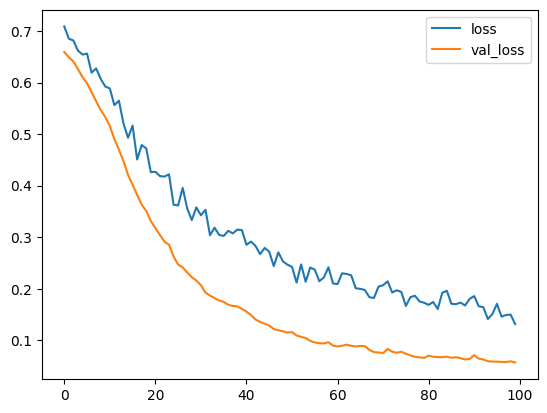

In [9]:
# Sketch the loss and validation loss functions magnitude based on the epoch number 
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


The depicted plot vividly illustrates a substantial decline in the magnitude of the loss function, plummeting significantly from its initial value of over 0.75 to a remarkable 0.18. This pronounced trend underscores that by increasing the number of epochs – signifying the model's iterative training cycles on the training dataset – its predictive prowess substantially improves.

Notably, the val_loss (validation dataset loss function) exhibits an even more pronounced reduction compared to the primary loss function. Initially hovering at approximately 0.68, it remarkably diminishes to a mere 0.07. This pattern can be attributed to the fact that the loss function is computed using the validation set. As a result, the algorithm consistently strives to minimize the value of the validation loss function. This phenomenon could potentially account for the observed trend where the training dataset loss function consistently maintains a higher value across all points on the curve.

To continue, our teacher uses a 'classification_report' function from sklearn to investigate the different evaluation metrics. Then sketchin confusion matrix.

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



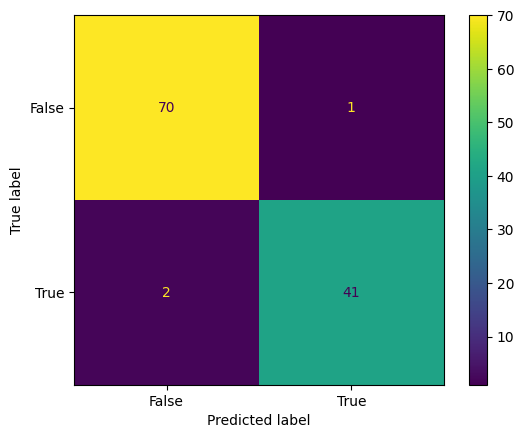

In [10]:
# make the prediction list
predicted=(model.predict(X_test) > 0.5).astype(int)

# print evaluation metrices
print(classification_report(y_test, predicted))

# sketch the confusion matrix
confusion_matrix = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                    display_labels = [False, True])

cm_display.plot()
plt.show()

The evaluation metrics consistently illustrate a remarkable level of accuracy for this model. In this particular run, a mere three labels are predicted inaccurately, resulting in an impressive precision score of 0.97—an exceedingly high value.

However, it's important to acknowledge that this heightened performance could potentially be influenced by utilizing the testing dataset as the validation dataset during the training phase. As a result, the subsequent phase involves an initial division of the dataset into three distinct subsets: training, validation, and testing. Following this partitioning, the model is retrained on the modified dataset, and its performance is subsequently assessed and evaluated. One way to divide the dataset into three parts is to use train_test_split twice.

Here, I decided to seperate 30% of the dataset dor testing and validation porpuse. The reason is that the dataset is quite small with 569 samples. Consequently, I can not slice 40% of the original dataset which is a conventional proportion for this aim.

In [9]:
# Partitioned the feature matrix into training and (test\val) dataset
X_train, X_test_val, y_train, y_test_val = train_test_split(
  X, y, test_size=0.30, random_state=42)

# Divide testing and validation datasets
X_test, X_val, y_test, y_val = train_test_split(
  X_test_val, y_test_val, test_size=0.50, random_state=42)

# Normalize the datasets using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In the next step, I will make a model similar to the privious model, but this time I will train it using X_train, and X_val.

In [9]:
# Make the model
model_2 = Sequential()

# Add the first fully connected hidden layer with 20 output activations(neurons)
model_2.add(Dense(20, activation='relu'))
model_2.add(Dropout(0.5))

# Add the second fully connected hidden layer with 10 output activations(neurons)
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(0.5))

# Add the output layer with just one output, which is the label of the toumor.('0', '1')
model_2.add(Dense(1, activation='sigmoid'))

# Complie the model
model_2.compile(loss='binary_crossentropy', optimizer='adam')

# train the data by using 100 epoch, and validation set
model_2.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100


13/13 [==============================] - 1s 18ms/step - loss: 0.7609 - val_loss: 0.6736
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7240 - val_loss: 0.6587
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6848 - val_loss: 0.6436
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6714 - val_loss: 0.6324
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6716 - val_loss: 0.6272
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6718 - val_loss: 0.6171
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6506 - val_loss: 0.6034
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.5875
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6352 - val_loss: 0.5755
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6209 - val_loss: 0.5618
Epoch 11/100
13/13 [

<Axes: >

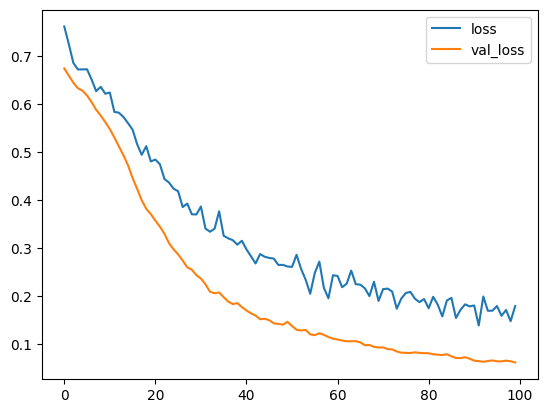

In [10]:
# Sketch the loss and validation loss functions magnitude based on the epoch number 
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

The changes in both loss functions are almost the same in comparison to the privious model.

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        37

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



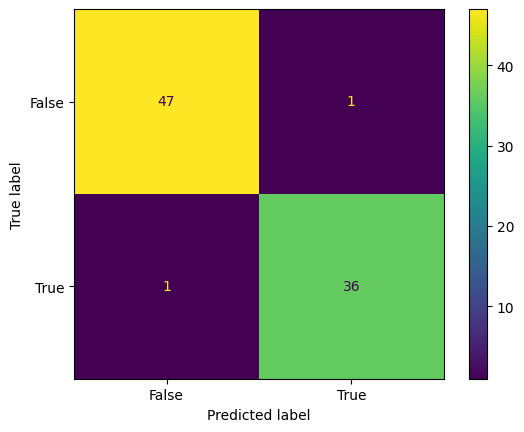

In [11]:
# make the prediction list
predicted=(model_2.predict(X_test) > 0.5).astype(int)

# print evaluation metrices
print(classification_report(y_test, predicted))

# sketch the confusion matrix
confusion_matrix = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                    display_labels = [False, True])

cm_display.plot()
plt.show()

It is evident that the evaluation metrics remain consistent, and the model demonstrates nearly identical precision and confusion matrix outcomes. However, I hold the view that this second model holds greater reliability. One potential factor contributing to the closely matched performance of both models could be the dataset size. It is plausible that with an enlarged dataset or different test data, 'model_2' might exhibit enhanced performance compared to the first model. This supposition stems from the consideration of potential overfitting in the first model, emphasizing the prospective advantages of the second model's improved generalizability.

In the context of parameter tuning, given the model's impressive performance with a precision of 0.98%, I am of the opinion that the current architecture and hyperparameters are well-aligned for the task at hand. The only hyper parameter that can be add to the model is batch hyper parameter that I will try to add it to the model in the next step.

As I explained above, by using batches, the model divided training dataset into a group of batches with definite size, and then implement stochastic gradient decent technique (or Adam technique) on each batches. While this approach may slightly decrease the precision of the model, the training time-run decreases drastically. However, in this specific dataset, the size of the dataset is relativly small, so by considering only one batch the training process is still quite fast. Thus, I believe this can be a reason why batch option was not used in the first place. 

Nonetheless, if an individual is persistant on using batch in the model, the right place can be 'fit' term. I will make a third model by using batch and compare the result with the two privious models.

Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 0.7160 - val_loss: 0.6652
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6808 - val_loss: 0.6480
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6609 - val_loss: 0.6312
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6709 - val_loss: 0.6149
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6434 - val_loss: 0.5907
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6245 - val_loss: 0.5685
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6063 - val_loss: 0.5443
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5762 - val_loss: 0.5196
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5535 - val_loss: 0.4956
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5649 - val_loss: 0.4746
Epoch 11

<Axes: >

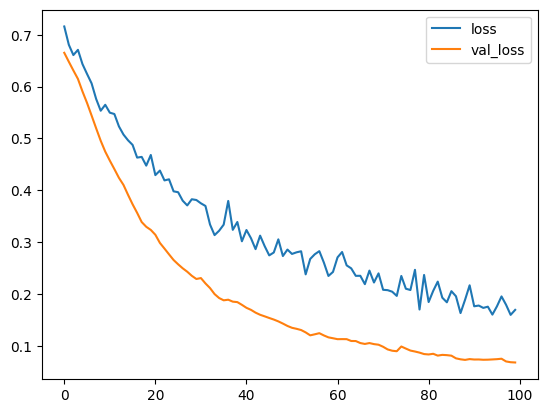

In [10]:
# Make the model (model with batch)
model_3 = Sequential()

# Add the first fully connected hidden layer with 20 output activations(neurons)
model_3.add(Dense(20, activation='relu'))
model_3.add(Dropout(0.5))

# Add the second fully connected hidden layer with 10 output activations(neurons)
model_3.add(Dense(10, activation='relu'))
model_3.add(Dropout(0.5))

# Add the output layer with just one output, which is the label of the toumor.('0', '1')
model_3.add(Dense(1, activation='sigmoid'))

# Complie the model
model_3.compile(loss='binary_crossentropy', optimizer='adam')

# train the data by using 100 epoch, and validation set
model_3.fit(x=X_train, y=y_train, epochs=100, batch_size= 30,validation_data=(X_val, y_val))

# Sketch the loss and validation loss functions magnitude based on the epoch number 
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        37

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



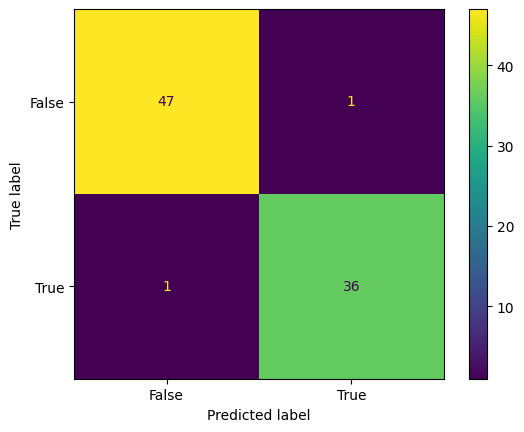

In [11]:
# make the prediction list
predicted=(model_3.predict(X_test) > 0.5).astype(int)

# print evaluation metrices
print(classification_report(y_test, predicted))

# sketch the confusion matrix
confusion_matrix = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                    display_labels = [False, True])

cm_display.plot()
plt.show()

With size_batch=30, nothing is change in the outcome of the model.